In [450]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [451]:
samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=samples_per_class)

In [452]:
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=samples_per_class)
positive_samples

array([[ 2.68037045e+00, -8.26773855e-01],
       [ 2.99040498e+00, -4.72334514e-01],
       [ 3.11680116e+00, -3.00145718e-01],
       ...,
       [ 3.21132842e+00,  3.79157620e-01],
       [ 2.64696886e+00,  3.70623598e-01],
       [ 1.48598076e+00,  4.35046771e-05]])

In [453]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [454]:
targets = np.vstack((np.zeros((samples_per_class, 1), dtype="float32"),
                     np.ones((samples_per_class, 1), dtype="float32")))


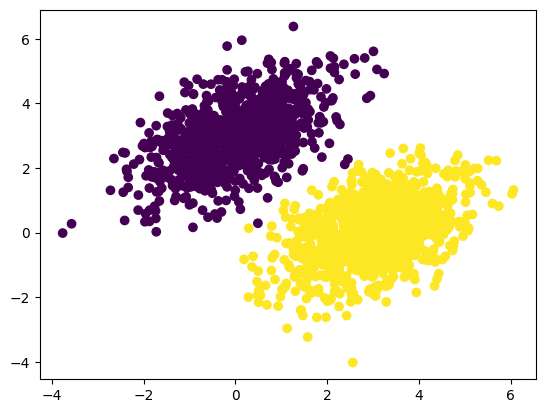

In [455]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets)

In [456]:
W = tf.Variable(initial_value=tf.random.uniform(shape=(2, 1)))
b = tf.Variable(tf.zeros(shape=(1,)))
inputs.shape


(2000, 2)

In [457]:
# Forward Step
def model(inputs, activation_function=tf.nn.elu):
    linear = tf.matmul(inputs, W) + b
    return activation_function(linear)

In [458]:
# Calculate Loss
def square_loss(targets, predictions):
    sample_loss = tf.square(targets - predictions)
    return tf.reduce_mean(sample_loss)

In [459]:
learning_rate = 0.1


def train_step_with_SGD(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    # get gradients against each of the training variables 
    grad_loss_W, grad_loss_b = tape.gradient(loss, [W, b])
    # the SGD part in this equation
    W.assign_sub(grad_loss_W * learning_rate)
    b.assign_sub(grad_loss_b * learning_rate)
    return loss

In [460]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.1)

def train_step_with_adam(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)

    # Get gradients
    gradients = tape.gradient(loss, [W, b])
    # Apply gradients using Adam optimizer
    optimizer.apply_gradients(zip(gradients, [W, b]))
    return loss

In [461]:
# for step in range(80):
#     loss = train_step_with_SGD(inputs, targets)
#     print(f"Loss at step {step}: {loss:.4f}")

In [462]:
for step in range(80):
    loss = train_step_with_adam(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 4.0357
Loss at step 1: 2.9127
Loss at step 2: 2.1241
Loss at step 3: 1.5226
Loss at step 4: 1.0460
Loss at step 5: 0.6894
Loss at step 6: 0.4483
Loss at step 7: 0.3099
Loss at step 8: 0.2521
Loss at step 9: 0.2526
Loss at step 10: 0.2889
Loss at step 11: 0.3373
Loss at step 12: 0.3776
Loss at step 13: 0.4010
Loss at step 14: 0.4093
Loss at step 15: 0.4096
Loss at step 16: 0.4097
Loss at step 17: 0.4143
Loss at step 18: 0.4238
Loss at step 19: 0.4350
Loss at step 20: 0.4433
Loss at step 21: 0.4453
Loss at step 22: 0.4405
Loss at step 23: 0.4311
Loss at step 24: 0.4203
Loss at step 25: 0.4109
Loss at step 26: 0.4035
Loss at step 27: 0.3970
Loss at step 28: 0.3890
Loss at step 29: 0.3775
Loss at step 30: 0.3621
Loss at step 31: 0.3435
Loss at step 32: 0.3233
Loss at step 33: 0.3026
Loss at step 34: 0.2820
Loss at step 35: 0.2607
Loss at step 36: 0.2377
Loss at step 37: 0.2124
Loss at step 38: 0.1850
Loss at step 39: 0.1571
Loss at step 40: 0.1305
Loss at step 41: 0.1073
Lo

In [463]:
W.numpy(), b.numpy()

(array([[ 0.13132101],
        [-0.15887453]], dtype=float32),
 array([0.5607455], dtype=float32))

In [464]:
predictions = model(inputs)

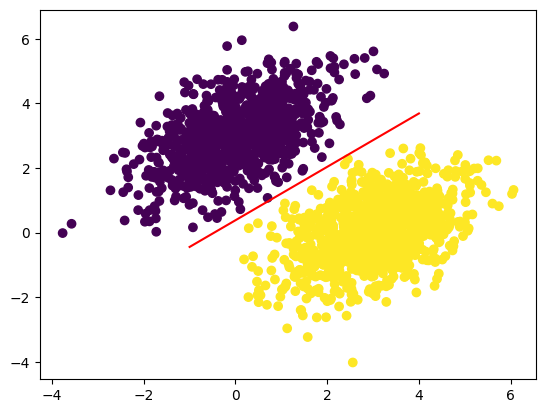

In [465]:
x = np.linspace(-1, 4, 100)                                          
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]                            
plt.plot(x, y, "-r")                                                 
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)